# **Preprocessing**

In [ ]:
# Actualizamos scikit-learn a la última versión
!pip install -U scikit-learn

# Importamos scikit-learn
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns   # Librería de visualización de datos estadísticos.
import mlxtend
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [ ]:
!python --version
print('Scikit-learn', sklearn.__version__)
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

Python 3.7.15
Scikit-learn 1.0.2
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2


In [ ]:
from mlxtend.plotting import plot_decision_regions

# Función para visualizar la superficie de decisión de un clasificador.
def plot_decision_region(X, y, clf, classes, title = ""):
  fig, ax = plt.subplots(dpi = 120)
  plot_decision_regions(X, y, clf = clf, ax = ax)
  handles, _ = ax.get_legend_handles_labels()
  ax.legend(handles, classes)
  ax.set_title(title)
  fig.show()

In [ ]:
def plot_data(X, y, model = None, ax = None, title=None):

    if ax is None:
      _, ax = plt.subplots(dpi = 110)

    if model is not None:
      pred_fun = gen_pred_fun(model)
      plot_decision_region(X, pred_fun, ax)

    y_unique = np.unique(y)
    df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'Clases': y})
    sns.set_theme()
    sns.scatterplot(data = df, x = 'x1', y = 'x2',
                    hue = 'Clases',style = 'Clases', ax = ax, palette = 'Set1').set_title(title)

In [ ]:
def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))

  return df



### **1- Cargue de los datos**

In [ ]:
wild_fire = pd.read_csv('WildFire_Prediction_Data_Set.csv', encoding='ISO-8859-1', sep = ',')

### **2- Análisis exploratorio y preprocesamiento**

In [ ]:
wild_fire.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [ ]:
wild_fire.describe()

,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


In [ ]:
wild_fire.groupby('CLASS').agg([np.mean, np.std, np.min, np.max])

NDVI                                         LST              \
             mean       std      amin      amax          mean         std   
CLASS                                                                       
fire     0.533801  0.074962  0.342016  0.781723  14818.157751  293.662370   
no_fire  0.562025  0.096535  0.030735  0.753615  14565.976683  366.672662   

                               BURNED_AREA                           
            amin          amax        mean       std amin      amax  
CLASS                                                                
fire     13932.0  15552.385079    4.762614  0.667451  3.0  9.000000  
no_fire  13137.0  15611.570513    4.649479  0.554787  3.0  5.608108

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


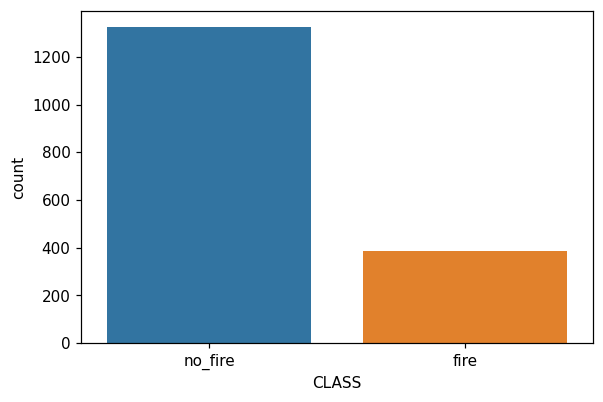

In [ ]:
plt.figure(dpi = 110)
sns.countplot(wild_fire['CLASS']);

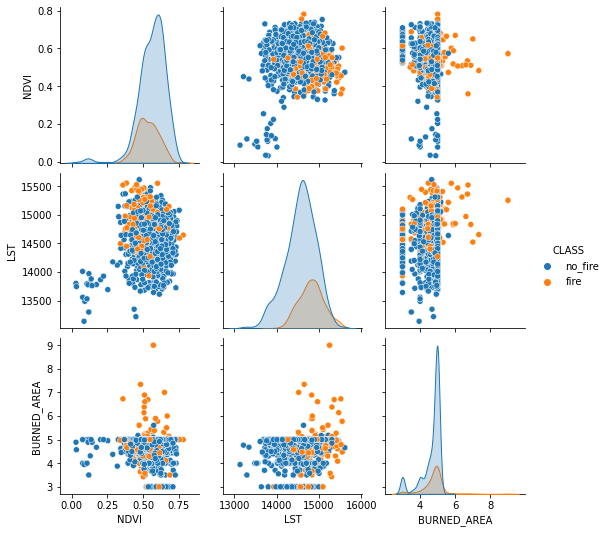

In [ ]:
sns.pairplot(wild_fire, hue='CLASS');

In [ ]:
wild_fire['CLASS'] = wild_fire['CLASS'].replace(['no_fire'], 0)
wild_fire['CLASS'] = wild_fire['CLASS'].replace(['fire'], 1)

In [ ]:
a = (len(wild_fire.columns))-1
X = wild_fire.iloc[:,:a]
y = wild_fire.iloc[:,-1]

print(X, y)

          NDVI           LST  BURNED_AREA
0     0.506782  14584.272727     4.692308
1     0.522150  14655.833333     5.000000
2     0.682284  14780.000000     5.000000
3     0.120046  13298.500000     3.500000
4     0.568734  14743.000000     5.000000
...        ...           ...          ...
1708  0.621721  14406.000000     5.000000
1709  0.709715  14330.400000     4.851852
1710  0.613000  14751.500000     3.000000
1711  0.614471  13611.000000     4.921053
1712  0.549497  14269.777778     5.000000

[1713 rows x 3 columns] 0       0
1       0
2       1
3       0
4       0
       ..
1708    0
1709    0
1710    1
1711    0
1712    1
Name: CLASS, Length: 1713, dtype: int64


In [ ]:
y.value_counts()

0    1327
1     386
Name: CLASS, dtype: int64

In [ ]:
scaler = StandardScaler()
X_transf = scaler.fit_transform(X)